In [1]:

#Import dependencies
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch


In [2]:
# File to Load 
val_df = pd.read_csv("Resources/dollarvalue.csv")
# Format Dataframe
valu_df = pd.DataFrame(val_df.rename(columns={ 
     'Table of contents': 'State/territory', 
    'Unnamed: 1':'Financial Assitance Received',
    'Unnamed: 2':'Male Number',
    'Unnamed: 3':'Males Average($)',
    'Unnamed: 4':'Female Number',
    'Unnamed: 5':'Females Average($)',
    'Unnamed: 6':'Total clients',
    'Unnamed: 7':'Total expenditure($)'}))

# Deleting Unwanted rows
valu_df = valu_df.iloc[4:]
valu_df = valu_df.dropna(how = "any")
valu_df.head()

,State/territory,Financial Assitance Received,Male Number,Males Average($),Female Number,Females Average($),Total clients,Total expenditure($)
4,National,Payment for short term or emergency accommodation,"9,975",999.79,"11,613","1,003.43","21,770","1,004.51"
5,National,Payment for establishing/maintaining tenancy,"9,723",869.73,"19,721","1,202.48","29,572","1,091.20"
6,National,Payment for training/education/employment,981,336.50,"1,577",490.51,"2,569",430.42
7,National,Payment for accessing external specialist serv...,559,297.90,"1,847",450.90,"2,413",414.57
8,National,Other payment,"12,374",189.81,"23,952",419.31,"36,477",340.45


In [3]:
# Create National Series
National_df = valu_df.loc[valu_df["State/territory"] == "National"]
National_df = National_df
# Create WA series
WA_df = valu_df.loc[valu_df["State/territory"] == "WA"]
WA_df = WA_df
#Merge the two for Visualisation
Assist_value_df = National_df.append(WA_df)
#Remove all unwanted columns
Assist_value_df = Assist_value_df.drop(["Male Number", "Female Number", "Total clients"], axis = 1)
Assist_value_df

,State/territory,Financial Assitance Received,Males Average($),Females Average($),Total expenditure($)
4,National,Payment for short term or emergency accommodation,999.79,"1,003.43","1,004.51"
5,National,Payment for establishing/maintaining tenancy,869.73,"1,202.48","1,091.20"
6,National,Payment for training/education/employment,336.50,490.51,430.42
7,National,Payment for accessing external specialist serv...,297.90,450.90,414.57
8,National,Other payment,189.81,419.31,340.45
9,National,Total,807.69,"1,077.87",976.01
28,WA,Payment for short term or emergency accommodation,245.35,227.87,231.26
29,WA,Payment for establishing/maintaining tenancy,422.29,487.96,469.81
30,WA,Payment for training/education/employment,133.29,180.85,165.62
31,WA,Payment for accessing external specialist serv...,187.77,124.98,133.58


[Text(0, 0, '1004.51'),
 Text(0, 0, '1091.2'),
 Text(0, 0, '430.42'),
 Text(0, 0, '414.57'),
 Text(0, 0, '340.45')]

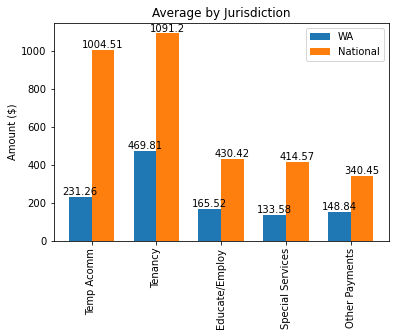

In [4]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['Temp Acomm', 'Tenancy', 'Educate/Employ', 'Special Services', 'Other Payments']
# Data
WA_df = [231.26, 469.81, 165.52, 133.58, 148.84]
National_df = [1004.51, 1091.20, 430.42, 414.57, 340.45]
# the label locations
x = np.arange(len(labels))  
# the width of the bars
width = 0.35


fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, WA_df, width, label='WA')
rects2 = ax.bar(x + width/2, National_df, width, label='National')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Amount ($)')
ax.set_title('Average by Jurisdiction')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation="vertical")
ax.legend()

ax.bar_label(rects1, padding=0)
ax.bar_label(rects2, padding=0)


Observations
•	Accommodation and Tenancy requests were the most requested type of assistance requested
•	National allowances were over 4 times the allowance WA provided their homeless
•	The highest request was for tenancy assistance, National figures doubled WA assistance allowances
•	Educational and employment services and specialist services such as mental health, rehabilitation and couples mediation or violence prevention were the next highest sought 
•	Other payments includes food vouchers, laundry and childcare services.


In [5]:
# File to Load 
totals_df = pd.read_csv("Resources/Unmettotals.csv")
totals_df = totals_df.drop(["Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8", "Unnamed: 9"],axis = 1) 
#Drop Unwanteed Columns
totals_df = totals_df.dropna(how = "any")
totals_df = totals_df.rename(columns={ 
     'Table of contents': 'Homeless Requests Not Met',
     'Unnamed: 4': 'WA'})
totals_df.head()

,Homeless Requests Not Met,WA
3,Daily average,57.1


In [6]:
# Read CSV File
mf_un_df = pd.read_csv("Resources/malefemasle unmet.csv")
# Format Dataframe
mf_un_df = pd.DataFrame(mf_un_df.rename(columns={ 
    'Table of contents': 'State/territory', 
    'Unnamed: 1':'Sex',
    'Unnamed: 2':'Short Term Accomodation',
    'Unnamed: 3':'Other Housing/Accomodation',
    'Unnamed: 4':'Specialised Service',
    'Unnamed: 5':'General Assistance/Support',
    'Unnamed: 6':'Assistance for Family/Domestic Violence',
    'Unnamed: 7':'Total Unassisted Requests'}))
# Extract WA data only
mf_wa_df = mf_un_df.loc[mf_un_df["State/territory"] == "WA"]


mf_wa_df.head()

,State/territory,Sex,Short Term Accomodation,Other Housing/Accomodation,Specialised Service,General Assistance/Support,Assistance for Family/Domestic Violence,Total Unassisted Requests
19,WA,Males,13.2,5.5,0.3,3.6,0.8,17.5
20,WA,Females,25.4,10.3,1.4,7.2,3.7,35.9
21,WA,Total,38.6,15.8,1.8,10.8,4.5,53.4
22,WA,Per cent,72.3,29.7,3.3,20.2,8.4,100.0


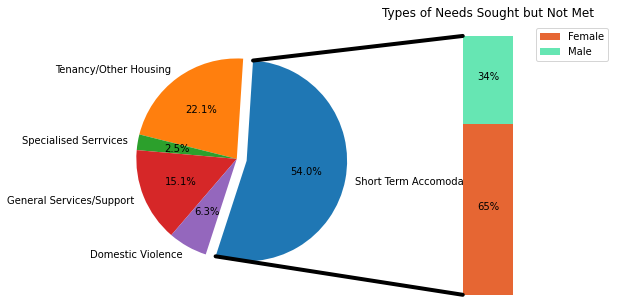

In [7]:
# The path to our CSV file
file = "Resources/malefemasle unmet.csv"

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 5))
fig.subplots_adjust(wspace=0)


# pie chart parameters
ratios = [38.6, 15.8, 1.8, 10.8, 4.5]
labels = ['Short Term Accomodation', 'Tenancy/Other Housing', 'Specialised Serrvices', 'General Services/Support', 'Domestic Violence']
explode = [0.1, 0, 0, 0, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters
xpos = 0
bottom = 0
bottom = 0
ratios = [.658, .341]
width = .2
colors = [[.9, .4, .2], [.4, .9, .7], [.4, .2, .7], [.2, .6, .7]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='center')

ax2.set_title('Types of Needs Sought but Not Met')
ax2.legend(('Female', 'Male'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
# get the wedge data
theta1, theta2 = ax1.patches[0].theta1, ax1.patches[0].theta2
center, r = ax1.patches[0].center, ax1.patches[0].r
bar_height = sum([item.get_height() for item in ax2.patches])

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, 0), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

Observations
Of the 57 requests for help daily in Perth, Short-Term emergency accomodation is sought, predominantly by 
females.''
The request for Domestic Violence assistance is so significant it is a division in th is data, substance 
abuse and mental health fall into the smallest section- specialist services. This number is nearly trebled by 
domestic violence requests'.
The second highest catagory was tenancy and other housing asistance, with WAs growing housing market and 
contrary rental availabilty declining, the vulnerable reach out to get help with these matters, indidcating 
that this cohort wouldbe considered 'At Risk' of homelessness, with over a quarter of requests for this catagory,
the lack of assistance can only eventually contribute to the growing homeless epidemic. 
Other services relates to food vouchers, childcare, education, legal, financial and cultural.

In [8]:
# File to Load 
agency_df = pd.read_csv("Resources/number per agency.csv")
# Delete Unwanted Columns
agency_df = agency_df.drop(["Unnamed: 1", "Unnamed: 2", "Unnamed: 3", "Unnamed: 5", "Unnamed: 6", "Unnamed: 7", "Unnamed: 8"],axis = 1) 
# Deleting first two rows (irrelavant)
agency_df = agency_df.dropna(how = "any")
agency_df = agency_df.rename(columns={ 
     'Table of contents': 'Homeless Agency Capacity',
     'Unnamed: 4': 'WA'})
agency_df = agency_df.iloc[1:]

agency_df

,Homeless Agency Capacity,WA
3,0 to 99,93
4,100 to 199,44
5,200 to 299,22
6,300 to 599,13
7,"600 to 1,499",2
8,"1,500 or more",3
9,Total,177


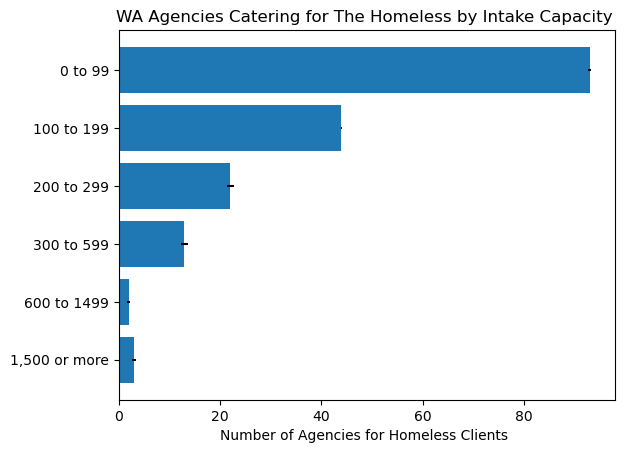

In [9]:
# Fixing random state 
np.random.seed(19680801)
plt.rcdefaults()
fig, ax = plt.subplots()

# Data
Capacity = ('0 to 99', '100 to 199', '200 to 299', '300 to 599', '600 to 1499', '1,500 or more')
data = [93, 44, 22, 13, 2 , 3]
y_pos = np.arange(len(Capacity))
np.random.rand(len(Capacity))
error = np.random.rand(len(Capacity))
# Set Axis
ax.barh(y_pos, data, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(Capacity)
ax.invert_yaxis() 
ax.set_xlabel('Number of Agencies for Homeless Clients ')
ax.set_title('WA Agencies Catering for The Homeless by Intake Capacity ')

plt.show()

Observations
•	With 177 facilities in Perth to cater for the homeless, there is only 5 that can cater for larger cohorts of 
vulnerable citizens. 
•	Most of the organisations cater for groups between 0-99 or 100-199.


In [11]:
# File to read
tent_df = pd.read_csv("Resources/tent.csv")
tent_df = tent_df.dropna(how = "any")
tent_df = tent_df.iloc[1:]

tent_df = pd.DataFrame(tent_df.rename(columns={ 
    'tent':' '}))


tent_df

,,
House/townhouse/flat,118,0.5
Caravan,"3,138",12.6
Tent,"1,346",5.4
Cabin,"1,126",4.5
Boat,38,0.2
Improvised building/dwelling,"2,008",8
No dwelling/street/park/in the open,"11,692",46.8
Motor vehicle,"5,487",21.9
Emergency accommodation,30,0.1
Other,20,0.1


In [12]:
goals_df = pd.read_csv("Resources/goals.csv")
goals_df = goals_df.dropna(how = "any")
# Extract WA data only
goals_wa_df =goals_df.loc[goals_df["Table of contents"] == "WA"]
goals_wa_df
goals_wa_df

,Table of contents,Unnamed: 1,Unnamed: 2,Unnamed: 3
51,WA,Clients with case management plan:,"10,246",49.4
52,WA,Clients with an individual case management plan:,"8,287",40
53,WA,No goals met,520,6.3
54,WA,Some goals met,"6,490",78.3
55,WA,All goals met,"1,277",15.4
56,WA,Clients who were part of another person's case...,"1,959",9.4
57,WA,Clients with no case management plan,"10,494",50.6
59,WA,Client did not agree to one,"1,036",9.9
60,WA,Service episode too short,"4,492",42.8
61,WA,Other,"4,966",47.3


In [13]:
goals_wa_df = pd.DataFrame(goals_wa_df.rename(columns={ 
    'Table of contents': 'State/territory', 
    'Unnamed: 1':'Goals Status',
    'Unnamed: 2':'Number',
    'Unnamed: 3':'Percent'}))
goals_wa_df

,State/territory,Goals Status,Number,Percent
51,WA,Clients with case management plan:,"10,246",49.4
52,WA,Clients with an individual case management plan:,"8,287",40
53,WA,No goals met,520,6.3
54,WA,Some goals met,"6,490",78.3
55,WA,All goals met,"1,277",15.4
56,WA,Clients who were part of another person's case...,"1,959",9.4
57,WA,Clients with no case management plan,"10,494",50.6
59,WA,Client did not agree to one,"1,036",9.9
60,WA,Service episode too short,"4,492",42.8
61,WA,Other,"4,966",47.3


In [15]:
# File to Load 
import numpy as np
import locale
import pandas as pd
from locale import atof
locale.setlocale(locale.LC_NUMERIC, '')


'en_AU.UTF-8'

In [16]:
# File to Load 
all_df = pd.read_csv("Resources/allcneedswa.csv")
# Drop unwanted columns
all_df = all_df.drop([ "Table of contents", 'Unnamed: 4', 'Unnamed: 6', 'Unnamed: 8', 'Unnamed: 10'],axis = 1)
# Rename Columns
all_df = pd.DataFrame(all_df.rename(columns={ 
    'Unnamed: 1':'Service/Type',
    'Unnamed: 2':'Specific Service',
    'Unnamed: 3':'Need Identified',
    'Unnamed: 5':'Provided',
    'Unnamed: 7':'Referred Only',
    'Unnamed: 9':'Not provided'}))
# Drop NA and fix headers
all_df = all_df.dropna(how = "any")
all_df



,Service/Type,Specific Service,Need Identified,Provided,Referred Only,Not provided
2,Group,Service and assistance type,Need identified,Provided,Referred only,Not provided \nor referred
3,Accommodation provision,Accommodation provision,"16,211","12,409","2,481","1,321"
4,Accommodation provision,Short term or emergency accommodation,"13,178","11,136",564,"1,478"
5,Accommodation provision,Medium term/transitional housing,"5,329","1,694","1,890","1,745"
6,Accommodation provision,Long term housing,"5,975",119,"2,290","3,566"
...,...,...,...,...,...,...
61,General services,Meals,"11,110","10,876",56,178
62,General services,Laundry/shower facilities,"10,421","10,335",27,59
63,General services,Recreation,"7,966","7,721",68,177
64,General services,Transport,"8,448","7,856",258,334


In [25]:
alls_df = all_df.set_index(["Service/Type", "Specific Service"])
grouped_df = alls_df.groupby(level=alls_df.index.names.difference(["Service/Type"]))

grouped_df.sum()




,Need Identified,Provided,Referred Only,Not provided
Specific Service,,,,
Accommodation provision,"16,211","12,409","2,481","1,321"
Advice/information,"17,375","17,025",141,209
Advocacy/liaison on behalf of client,"12,140","11,836",143,161
Assertive outreach for rough sleepers,"1,591","1,377",71,143
Assistance for family/domestic violence,"8,293","7,529",252,512
...,...,...,...,...
Short term or emergency accommodation,"13,178","11,136",564,"1,478"
Specialist counselling services,"2,285","1,405",482,398
Structured play/skills development,"2,403","2,204",80,119


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Read data sett,
file= grouped_df

# Data

services = grouped_df[["Accommodation provision", "Assistance to sustain housing tenure", "Mental health", "Family", "Disability, Drugs and Alcohol", "Legal/financial services", "Immigration/cultural services","Other specialist services","General services"]) 

provided = grouped_df(12409, 17026, 11836, 1377, 7529,12,409
 )
not_provided = grouped_df("Not Provided")
services = grouped_df["Specific Service"]
provided = np.array(["Provided"])
not_provided = (["Not Provided"])
idx = provided.argsort()
services, provided, not_provided = [np.take(x, idx) for x in ["Specialist Service", "Provided", "Not Provided"]]

y = np.arange("Service/Type")

fig, axes = plt.subplots(ncols=2, sharey=True)
axes[0].barh(y, provided, align='center', color='gray', zorder=10)
axes[0].set(title='Number of not_provided services')
axes[1].barh(y, not_provided, align='center', color='gray', zorder=10)
axes[1].set(title='not_provided (x $1000)')

axes[0].invert_xaxis()
axes[0].set(yticks=y, yticklabels=services)
axes[0].yaxis.tick_right()

for ax in axes.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()